In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from xgboost import XGBRegressor

In [98]:
train=pd.read_csv("Data/sales_train.csv")
test=pd.read_csv("Data/test.csv")
items=pd.read_csv("Data/items.csv")
cats=pd.read_csv("Data/item_categories.csv")
shops=pd.read_csv("Data/shops.csv")

In [99]:
all_data={"train":train,"test":test,"items":items,"items_categories":items_categories,"shops":shops}

In [104]:
for name,df in all_data.items():
    print("shape",df.shape)
    print(df)

shape (2935849, 6)
               date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1.0  
...     

In [105]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [106]:
for anme,df in all_data.items():
    print(df.shape)
    print(sum(df.duplicated()))

(2935849, 6)
6
(214200, 3)
0
(22170, 3)
0
(84, 2)
0
(60, 2)
0


In [107]:
for name,df in all_data.items():
    df.drop_duplicates(inplace=True)

In [108]:
for name,df in all_data.items():
    print(name)
    print(df.isnull().sum())

train
date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
test
ID         0
shop_id    0
item_id    0
dtype: int64
items
item_name           0
item_id             0
item_category_id    0
dtype: int64
items_categories
item_category_name    0
item_category_id      0
dtype: int64
shops
shop_name    0
shop_id      0
dtype: int64


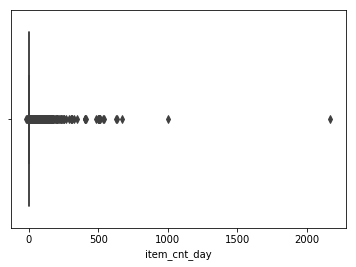

In [109]:
sns.boxplot(train.item_cnt_day)

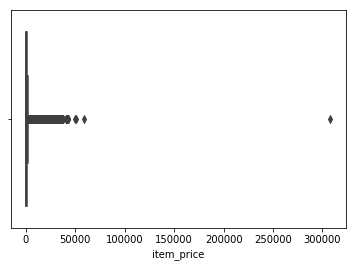

In [110]:
sns.boxplot(train.item_price)

In [111]:
train=train[train.item_cnt_day<1000]
train=train[train.item_price<100000]

In [112]:
train[train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [113]:
median=train[(train.shop_id==32) & (train.item_id==2973) & (train.date_block_num==4)].item_price.median()
median

1249.0

In [114]:
train.loc[train.item_price<0,"item_price"]=median

In [63]:
all_data=[train,test]

In [69]:
shops[(shops.shop_id==0) | (shops.shop_id==57)]

for df in all_data:
    df.loc[df.shop_id==0,"shop_id"]=57


In [73]:
shops[(shops.shop_id==1) | (shops.shop_id==58)]

for df in all_data:
    df.loc[df.shop_id==1,"shop_id"]=58

In [74]:
shops[(shops.shop_id==10) | (shops.shop_id==11)]
for df in all_data:
    df.loc[df.shop_id==10,"shop_id"]=11

In [77]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [90]:
shops["city"]=shops["shop_name"].str.split(' ').map(lambda x: x[0])

    

In [94]:
shops.loc[shops.city == '!Якутск', 'city'] = 'Якутск'

In [ ]:
shops["city_code"]=cats[""]

In [97]:
items_categories["item_categ"]

KeyError: 'item_category'